# Homework 1 - KC Housing Data 

This notebook will look at the Kaggle KC housing data https://www.kaggle.com/harlfoxem/housesalesprediction and build a classification model to predict when houses will be greater than 1 million dollars.

## Preliminaries

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

Import commonly used libraries and magic command for inline plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## EDA

First I will import the data and begin with some exploratory data analysis.

In [4]:
housing_df = pd.read_csv("./data/kc_house_data_classification.csv")

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

In [6]:
housing_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [7]:
housing_df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.069033
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.253515
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


 - We've looked at a little bit at the data but let's take a closer look by using `sweetviz' an creating and html file. 

In [8]:
#import sweetviz

In [9]:
#report = sweetviz.analyze(housing_df)

In [10]:
#report.show_html("output/sweetviz_report.html")

 - Next, I want to take a closer look at our target variable `price_gt_1M`.

In [11]:
housing_df.groupby(['price_gt_1M']).size()

price_gt_1M
0    20121
1     1492
dtype: int64

In [12]:
housing_df['price_gt_1M'].value_counts(normalize=True)

0    0.930967
1    0.069033
Name: price_gt_1M, dtype: float64

## Data preprocessing - variable type lists

Here I am going to create a list of the variables I've identifed as categorical and numeric. We will also transform the categorical variables `condition`, `grade`, `waterfont` and `view` using `OneHotEncoder`.

In [13]:
categorical_cols = ["waterfront", "view", "condition", "grade"]

In [14]:
categorical_cols

['waterfront', 'view', 'condition', 'grade']

In [15]:
numeric_cols = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "sqft_above", "sqft_basement", "yr_built", 
                           "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]

In [16]:
numeric_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

 - Capturing column indexing on categorical and numerical variable.

In [17]:
categorical_cols_idx = [housing_df.columns.get_loc(c) for c in categorical_cols]
categorical_cols_idx

[5, 6, 7, 8]

In [18]:
numeric_cols_idx =[housing_df.columns.get_loc(c) for c in numeric_cols]
numeric_cols_idx

[0, 1, 2, 3, 4, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [19]:
housing_df.iloc[:, categorical_cols_idx].nunique()

waterfront     2
view           5
condition      5
grade         12
dtype: int64

In [20]:
housing_df.iloc[:, numeric_cols_idx].nunique()

bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

 - Splitting the data into training and testing sets and setting the y variable to `price_gt_1M`.

In [22]:
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

 - Now that the data is split let's take a quick look to make sure everything is accounted for. 

In [24]:
y_train.describe()

count    17290.000000
mean         0.067264
std          0.250486
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: price_gt_1M, dtype: float64

In [25]:
X_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.00000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,3.364662,2.109023,2072.679063,1.518280e+04,1.49306,0.007981,0.232736,3.407114,7.647889,1782.472874,290.206189,1970.919780,84.608329,98077.913650,47.560316,-122.213932,1980.976750,12794.214633
std,0.905820,0.766583,913.241140,4.227845e+04,0.54001,0.088985,0.766870,0.646731,1.167214,821.985446,443.363580,29.400714,402.140669,53.341641,0.138581,0.141455,678.019946,27414.965956
min,0.000000,0.000000,290.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,399.000000,651.000000
25%,3.000000,1.500000,1420.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5100.000000
50%,3.000000,2.250000,1900.000000,7.600000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.231000,1830.000000,7620.000000
75%,4.000000,2.500000,2540.000000,1.065425e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98118.000000,47.678400,-122.125000,2350.000000,10080.000000
max,10.000000,8.000000,13540.000000,1.651359e+06,3.50000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [26]:
y_test.describe()

count    4323.000000
mean        0.076105
std         0.265196
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: price_gt_1M, dtype: float64

In [27]:
X_test.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4323.000000,4323.000000,4323.000000,4.323000e+03,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000
mean,3.395559,2.137694,2108.779089,1.480367e+04,1.499306,0.005783,0.240574,3.418691,7.692806,1812.059218,296.719870,1971.346519,83.578071,98078.044414,47.558999,-122.213753,2008.852880,12665.431645
std,1.021019,0.783990,938.501721,3.779799e+04,0.539936,0.075835,0.764162,0.666542,1.207340,851.759126,439.419497,29.264859,399.873711,54.159664,0.138504,0.138309,713.758526,26859.402704
min,0.000000,0.000000,384.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,384.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000,460.000000,660.000000
25%,3.000000,1.750000,1440.000000,5.080000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.469800,-122.324000,1480.000000,5100.000000
50%,3.000000,2.250000,1950.000000,7.665000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,0.000000,98065.000000,47.569600,-122.228000,1860.000000,7650.000000
75%,4.000000,2.500000,2580.000000,1.076450e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2250.000000,580.000000,1997.000000,0.000000,98117.500000,47.676200,-122.124500,2400.000000,10116.500000
max,33.000000,8.000000,12050.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,560617.000000


# Building Logistic Regression Models

Now that I'm a little more familiar with the data and it's split into testing and training sets I'll move onto looking at a few different model options. I will start with a Null Model to get a base understanding of predictions. Then create a one Ridge (l2) Model with `C=1.0` and two Lasso (l1) Models, one with `C=1.0` and one with `C=0.01`. Then I will use `LogisticRegressionCV` to compute the optional C-value using and L1 (lasso) penalties.

In addition to building the models I will also create a Confusion Matrix of both test and training data and graph the coefficients.

In [28]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
#Creating object for categorical transformer
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [30]:
#Creating object for numeric transformer
numeric_transformer = StandardScaler()

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

## Null Model

In [32]:
# Null model for train dataset
clf_model0 = np.mean(y_train == 0)
clf_model0

0.9327356853672644

In [33]:
# Null model for test dataset
clf_model_0 = np.mean(y_test == 0)
clf_model_0

0.9238954429794124

 - Looks like if we assume all house price predictions would be less than 1 million we would get approximately 93% accuracy on train and about 92% on test data.

## Model 1: Ridge regression with C=1.0

In [34]:
# Build classifier model
clf_model1 = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=2000)

In [35]:
# Append classifier to preprocessing pipeline.
clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model1)])

In [36]:
# Fit model on training data
clf1.fit(X_train, y_train)

# Print the testing and training scores
print(f"Training score: {clf1.score(X_train, y_train):.3f}")
print(f"Test score: {clf1.score(X_test, y_test):.3f}")

Training score: 0.962
Test score: 0.961


 - The test score is pretty close to the training score. This is a high accuracy but could be a sign of overfitting.

### Confusion Matrices

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

 - Let's look at Confusion Matrix on training data first.

Confusion matrix for train, without normalization
[[15934   193]
 [  467   696]]
Normalized confusion matrix for train
[[0.98803249 0.01196751]
 [0.40154772 0.59845228]]


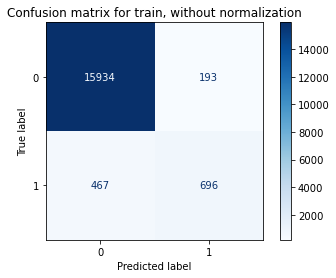

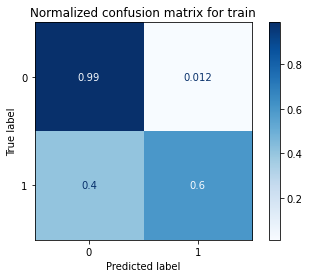

In [38]:
# Create titles
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

# Identify the model to use
class_names = clf1['classifier'].classes_

# Create Confusion Matrix
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf1, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

#Display Matrix
plt.show()

 - Let's look at Confusion Matrix on testing data next.

Confusion matrix for test, without normalization
[[3947   47]
 [ 123  206]]
Normalized confusion matrix for test
[[0.98823235 0.01176765]
 [0.37386018 0.62613982]]


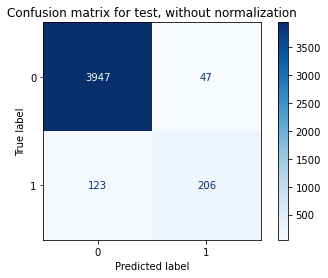

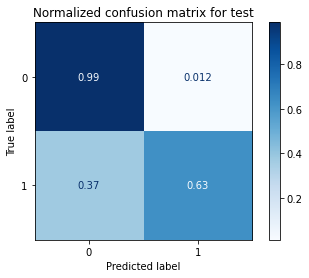

In [39]:
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf1['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf1, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

 - There is a better accuracy at predicting houses less than 1 million than predicting houses greater than 1 million. This could be due to the fact there happens to more houses less than 1 million than there are houses greater than 1 miilion in the dataset. The train and test perform about the same for predictions of houses less than 1 million. However, the test does slightly better at predicting houses over 1 million from 60% up to 63%.

#### Coefficient plotting

In [40]:
# Looking at the shape to confirm there is only 1 target variable.
clf1.named_steps['classifier'].coef_.shape

(1, 38)

In [41]:
clf1.steps[1]

('classifier', LogisticRegression(max_iter=2000, solver='saga'))

In [42]:
def coef_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
       
    if title:
        ax[0].set_title(title)

    for i in range(1):
        ax[i].plot(model.steps[1][1].coef_[i])

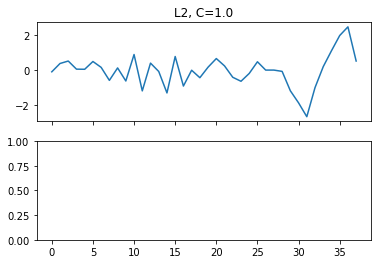

In [43]:
coef_plot(clf1, 'L2, C=1.0')

 - I tried to modify the code from the 3-class problem to this binary problem but everytime I changed it to 1 in the subplots I wouldn't get any data displayed.
 - There appear to be several variables bouncing right around/near 0 meaning they have little no relationship to determining our target variable.


## Model 2: Lasso regression with C=1.0

In [45]:
# BuildcClassifier model 2
clf_model2 = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=2000)

In [46]:
# Append classifier to preprocessing pipeline.
clf2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model2)])

In [47]:
# Fit model on training data
clf2.fit(X_train, y_train)

print(f"Training score: {clf2.score(X_train, y_train):.3f}")
print(f"Test score: {clf2.score(X_test, y_test):.3f}")

Training score: 0.962
Test score: 0.960


In [48]:
# Reprinting scores from Model 1 for quick reference.
print(f"Training score: {clf1.score(X_train, y_train):.3f}")
print(f"Test score: {clf1.score(X_test, y_test):.3f}")

Training score: 0.962
Test score: 0.961


 - There doesn't appear to be much of a difference in using Ridge verse Lasso in our training and testing scores when they both have a value of `C=1.0`. I'll create the Confusion Matrix again on both train and test data to see if there are any changes here. 

### Confusion Matrices

Confusion matrix for train, without normalization
[[15934   193]
 [  466   697]]
Normalized confusion matrix for train
[[0.98803249 0.01196751]
 [0.40068788 0.59931212]]


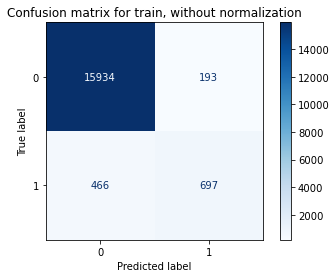

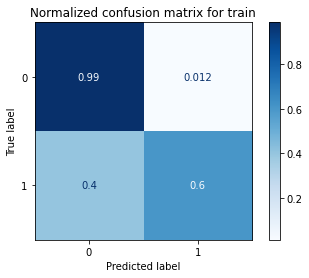

In [49]:
# Create train Matrix
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf2['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf2, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

 - There are no changes in training matrix from Model 1 verse Model 2.

Confusion matrix for test, without normalization
[[3947   47]
 [ 125  204]]
Normalized confusion matrix for test
[[0.98823235 0.01176765]
 [0.37993921 0.62006079]]


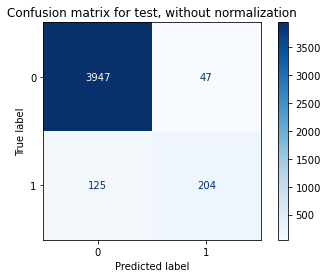

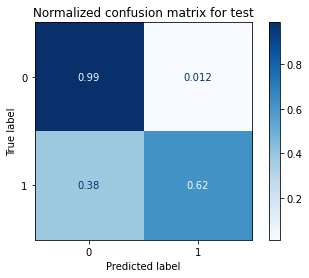

In [50]:
# Create test Matrix
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf2['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf2, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

 - There are no significant changes in testing matrix from Model 1 verse Model 2. 

#### Coefficient plotting

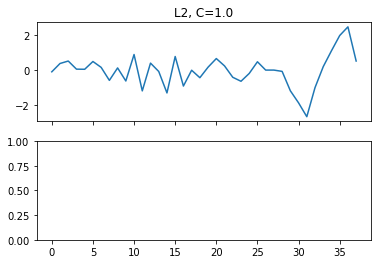

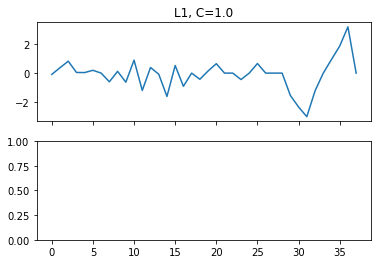

In [51]:
coef_plot(clf1, 'L2, C=1.0')
coef_plot(clf2, 'L1, C=1.0')

 - There are some subtle changes in the coefficient graphs above from Lasso (L1) model verse Ridge (L2) model above but nothing of significance. Some variables were moved closer to zero than others in an attempt to optimize the predictions but they both came to the same accuaracy. One doesn't appear to be more beneficial than the other. 

## Model 3: Lasso regression with C=0.01

In [52]:
# Build classifier model 3
clf_model3 = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=2000)

In [53]:
# Append classifier to preprocessing pipeline.
clf3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model3)])

In [54]:
# Fit model on new training data
clf3.fit(X_train, y_train)

print(f"Training score: {clf3.score(X_train, y_train):.3f}")
print(f"Test score: {clf3.score(X_test, y_test):.3f}")

Training score: 0.954
Test score: 0.950


In [55]:
# Reprint Model 1 & 2 for quick reference
print(f"Model 1:")
print(f"Training score: {clf1.score(X_train, y_train):.3f}")
print(f"Test score: {clf1.score(X_test, y_test):.3f}")
print(f"Model 2:")
print(f"Training score: {clf2.score(X_train, y_train):.3f}")
print(f"Test score: {clf2.score(X_test, y_test):.3f}")

Model 1:
Training score: 0.962
Test score: 0.961
Model 2:
Training score: 0.962
Test score: 0.960


 - There is a decrease in the accuracy compared to Model 1 and Model 2 but this is still a decent score on test and training. There is also a slight lower score on test verse training which leads me to believe might have less chance of being overfitted. 

### Confusion Matrices

Confusion matrix for train, without normalization
[[16001   126]
 [  676   487]]
Normalized confusion matrix for train
[[0.99218702 0.00781298]
 [0.58125537 0.41874463]]


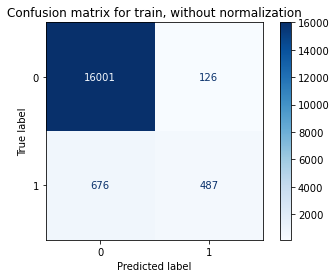

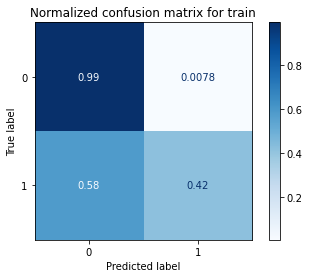

In [56]:
# Create train Matrix
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf3['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf3, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

 - There is definitely a change in the training data matrix. There wasn't much change on the predictions for houses under 1 million. However, there was a decrease from 60% down to 42% on accurately prediction houses over 1 million. This would align with the decrease in the over accuracy.

Confusion matrix for test, without normalization
[[3958   36]
 [ 180  149]]
Normalized confusion matrix for test
[[0.99098648 0.00901352]
 [0.54711246 0.45288754]]


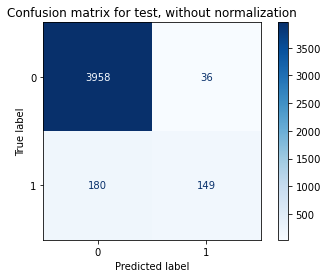

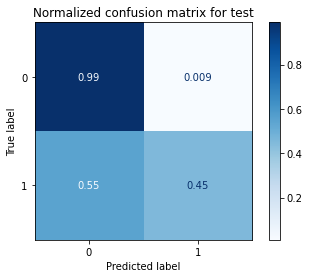

In [57]:
# Create test Matrix
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf3['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf3, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

 - Again, we see a decrease in accurately predicting house over 1 million from 62% on Model 1 & 2 down to 45% on Model 3 with `C=0.01`.

#### Coefficient plotting

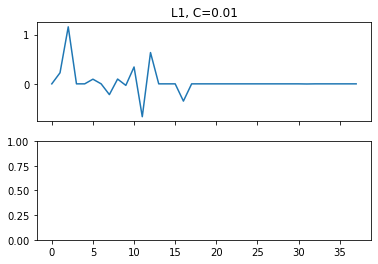

In [58]:
coef_plot(clf3, 'L1, C=0.01')

 - There is stark contrast on this graph verse the first two model graphs (see below). There are a large number of variables that have been shrunk/dropped in an attempt to optimize the predictions. Perhaps too many or the wrong variables were dropped because we did get a lower accruacy score with this model. 

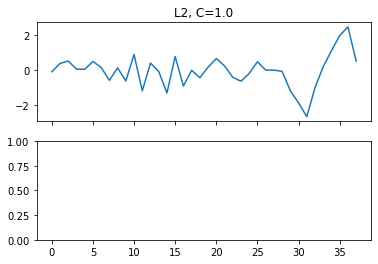

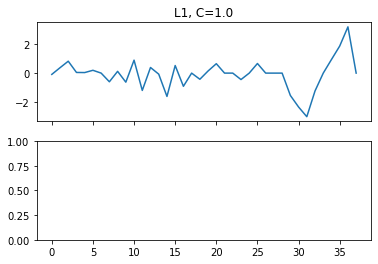

In [44]:
# Reprint Coefficient graphs from Model 1 & 2 for quick reference.
coef_plot(clf1, 'L2, C=1.0')
coef_plot(clf2, 'L1, C=1.0')

## Model 4: Lasso regression with optimal C value

In [59]:
#clf_model4 = LogisticRegressionCV(penalty='l1', solver='saga', max_iter=2000)
clf_model4 = LogisticRegressionCV(penalty='l1', solver='liblinear', max_iter=2000)

In [60]:
clf4 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model4)])

In [61]:
clf4.fit(X_train, y_train)

print(f"Training score: {clf4.score(X_train, y_train):.3f}")
print(f"Test score: {clf4.score(X_test, y_test):.3f}")

Training score: 0.962
Test score: 0.961


 - It does not appear at this point that letting `sklearn` predict the optimal `C` value helped. Let's take a look a the Confusion Matrix to see if there was any significant changes worth noting. 

Confusion matrix for train, without normalization
[[15939   188]
 [  470   693]]
Normalized confusion matrix for train
[[0.98834253 0.01165747]
 [0.40412726 0.59587274]]


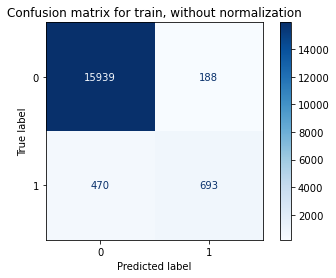

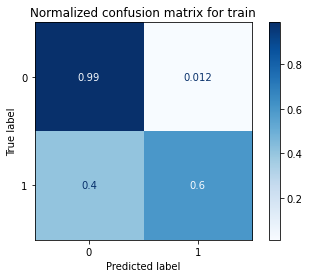

In [62]:
# Create train Matrix
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf4['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf4, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[3947   47]
 [ 122  207]]
Normalized confusion matrix for test
[[0.98823235 0.01176765]
 [0.37082067 0.62917933]]


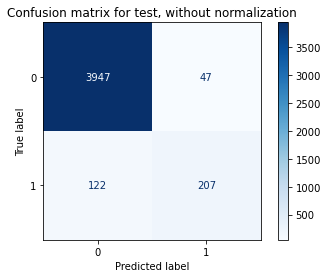

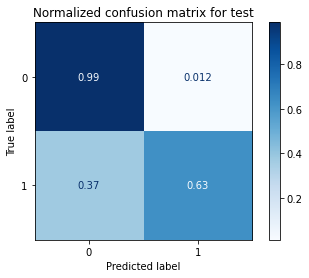

In [63]:
# Create test Matrix
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf4['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf4, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

 - The Confusion Matrix doesn't have any signifant changes that we didn't already see in Model 1 and 2. There was an increase of 1% on the accurate prediction of houses over 1 million.

## Task 5 - Random forest model

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
# Append random forest classifier to preprocessing pipeline.
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(oob_score=True, random_state=0))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

clf_rf.fit(X_train, y_train)

print(f"Training score: {clf_rf.score(X_train, y_train):.3f}")
print(f"Test score: {clf_rf.score(X_test, y_test):.3f}")

Training score: 1.000
Test score: 0.971


In [52]:
# Reprinted Models for reference
print(f"Model 1:")
print(f"Training score: {clf1.score(X_train, y_train):.3f}")
print(f"Test score: {clf1.score(X_test, y_test):.3f}")
print(f"Model 2:")
print(f"Training score: {clf2.score(X_train, y_train):.3f}")
print(f"Test score: {clf2.score(X_test, y_test):.3f}")
print(f"Model 3:")
print(f"Training score: {clf3.score(X_train, y_train):.3f}")
print(f"Test score: {clf3.score(X_test, y_test):.3f}")
print(f"Model 4:")
print(f"Training score: {clf4.score(X_train, y_train):.3f}")
print(f"Test score: {clf4.score(X_test, y_test):.3f}")
print(f"Model RF:")
print(f"Training score: {clf_rf.score(X_train, y_train):.3f}")
print(f"Test score: {clf_rf.score(X_test, y_test):.3f}")

Model 1:
Training score: 0.961
Test score: 0.962
Model 2:
Training score: 0.961
Test score: 0.961
Model 3:
Training score: 0.953
Test score: 0.953
Model 4:
Training score: 0.961
Test score: 0.961
Model RF:
Training score: 1.000
Test score: 0.971


 - We got a perfect score of 100% accuracy on the train data and only a 3% decrease in the test data. Definitely beats out all the models so far. I am expecting to see an huge increase on the accurate prediction scores for house over 1 million on the Confusion Matrices below. 

Confusion matrix for train, without normalization
[[16085     1]
 [    0  1204]]
Normalized confusion matrix for train
[[9.99937834e-01 6.21658585e-05]
 [0.00000000e+00 1.00000000e+00]]


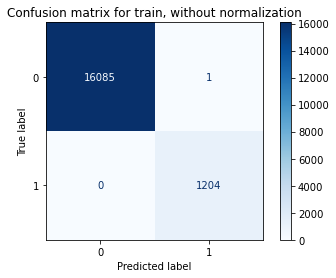

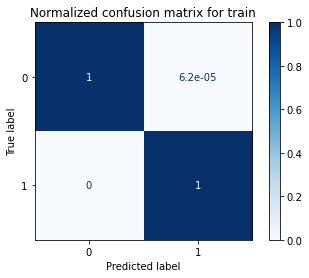

In [68]:
# Create train matrix
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_rf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix for test, without normalization
[[4005   30]
 [  96  192]]
Normalized confusion matrix for test
[[0.99256506 0.00743494]
 [0.33333333 0.66666667]]


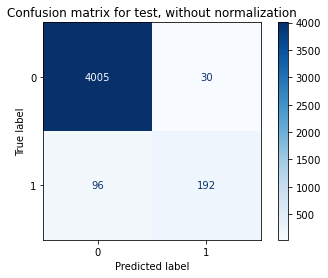

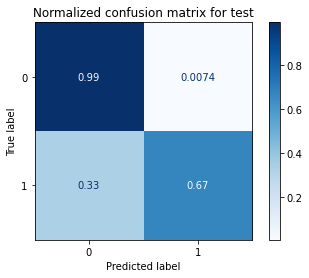

In [69]:
# Create test matrix
titles_options = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

class_names = clf_rf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

 - Even with the high accruacy score of 97% we still see that there is only a 67% chance of correctly predicting houses over 1 million. While that is a increase from the 63% we got on Model 3, it's still fairly low based on the overall accuracy we got which can be misleading. 

## Task 6 - a little error exploration (more challenging)

In [71]:
housing_df2 = pd.read_csv("./data/kc_house_data_regression.csv")

In [139]:
# Add price column working dataset
price_column = housing_df2["price"]
price1M_column = housing_df["price_gt_1M"]

house_prices = pd.concat([price1M_column, price_column], axis = 1)

house_prices

,price_gt_1M,price
0,0,221900.0
1,0,538000.0
2,0,180000.0
3,0,604000.0
4,0,510000.0
...,...,...
21608,0,360000.0
21609,0,400000.0
21610,0,402101.0
21611,0,400000.0


In [146]:
BadPredictions = house_prices.loc[house_prices['price_gt_1M'] == 0]
BadPredictions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20121 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price_gt_1M  20121 non-null  int64  
 1   price        20121 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 471.6 KB


In [147]:
BadPrediction_array = BadPredictions.to_numpy()

In [154]:
BadPrediction_array

array([[     0., 221900.],
       [     0., 538000.],
       [     0., 180000.],
       ...,
       [     0., 402101.],
       [     0., 400000.],
       [     0., 325000.]])

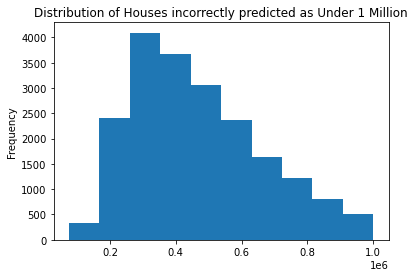

In [176]:
# create the histogram
ax = BadPredictions['price'].plot(kind='hist')
# set the title
ax.set_title("Distribution of Houses incorrectly predicted as Under 1 Million");

I keep getting the index numbers on the y-axis rather than house prices. I thought changing from a pandas dataframe to an array would solve that but I am still only getting the frequency rather than the actually  of the houses. 